In [0]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [0]:

df= pd.read_excel('/content/Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death
0,1.0,Andhra Pradesh,8,0,0
1,2.0,Chhattisgarh,1,0,0
2,3.0,Delhi,23,6,1
3,4.0,Gujarat,32,0,1
4,5.0,Haryana,17,11,0
5,6.0,Himachal Pradesh,2,0,1
6,7.0,Karnataka,33,3,1
7,8.0,Kerala,91,4,0
8,9.0,Madhya Pradesh,7,0,0
9,10.0,Maharashtra,87,0,2


In [0]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('/content/Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

In [0]:


df['Total cases'] = df['Total Confirmed cases (Indian National)'] 
total_cases = df['Total cases'].sum()
print('Total no of Covid cases  upto 24th march:', total_cases)


Total no of Covid cases  upto 24th march: 470


In [0]:

df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Cured,Death,Total cases,Total Active
0,Andhra Pradesh,8,0,0,8,8
1,Chhattisgarh,1,0,0,1,1
2,Delhi,23,6,1,23,16
3,Gujarat,32,0,1,32,31
4,Haryana,17,11,0,17,6
5,Himachal Pradesh,2,0,1,2,1
6,Karnataka,33,3,1,33,29
7,Kerala,91,4,0,91,87
8,Madhya Pradesh,7,0,0,7,7
9,Maharashtra,87,0,2,87,85


In [0]:

df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 421


,Total Active
Name of State / UT,
Kerala,87
Maharashtra,85
Telengana,33
Gujarat,31
Karnataka,29
Punjab,27
Rajasthan,26
Delhi,16
Ladakh,13


In [0]:


df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

##confirmed case vs recovered ones

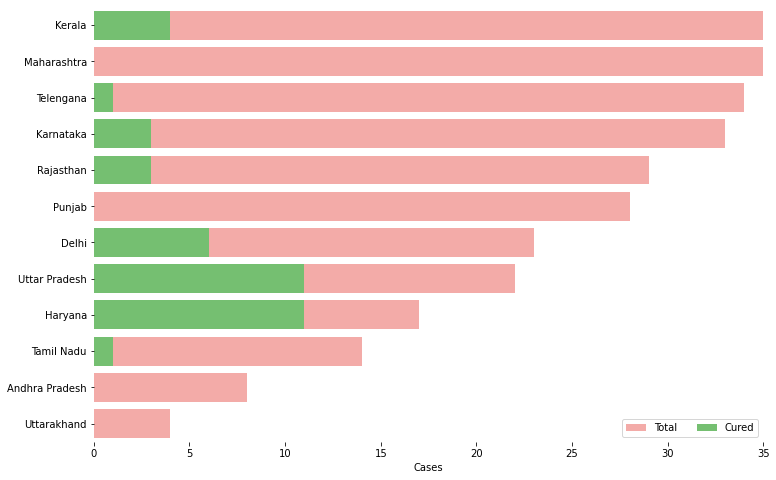

In [0]:

f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")



ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## Rising of Corona

In [0]:

import plotly
plotly.io.renderers.default = 'colab'

In [0]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# new corona cases upto today that is 24th march,2020

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

comparing cases in India to far developed countries like Italy, S.Korea, and Wuhan

In [0]:

fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:

from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [0]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{"colspan": 2}, None]], subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'], marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")), 1, 1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")), 1, 2)

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'], marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")), 2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

## growth of corna after 100 cases in india,korea,italy
No wuhan data is available after 21 so can't depict

In [0]:


title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True,
    ))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

Wolrd scenario


In [0]:
df = pd.read_csv('/content/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("/content/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("/content/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [0]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [0]:

df.query('Country=="India"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-01-30 16:00:00,1.0,0.0,0.0
1,2020-01-31 08:15:00,1.0,0.0,0.0
2,2020-01-31 23:59:00,1.0,0.0,0.0
3,2020-02-02 06:03:08,2.0,0.0,0.0
4,2020-02-03 21:43:02,30.0,0.0,0.0
5,2020-02-13 18:53:02,9.0,0.0,0.0
6,2020-02-16 07:43:02,45.0,0.0,45.0
7,2020-03-02 22:33:09,10.0,0.0,6.0
8,2020-03-04 12:33:03,28.0,0.0,3.0
9,2020-03-05 13:53:03,30.0,0.0,3.0


In [0]:

df.groupby('Date').sum().head()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0


In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
fig = go.Figure()

#upto 22nd march as no data is available furthur 

fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

In [0]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [0]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], animation_frame="Date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [0]:
confirmed.tail()

,ds,y
49,2020-03-11,125865.0
50,2020-03-12,128343.0
51,2020-03-13,145193.0
52,2020-03-14,156099.0
53,2020-03-15,167447.0



##Its time for forecasting!!! with 95% confidence and for next 10 days

In [0]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25


In [0]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,161049.269158,145684.586868,175171.272053
60,2020-03-22,165066.852886,150134.075343,179494.706241
61,2020-03-23,164093.851029,147856.208733,179602.667412
62,2020-03-24,167286.959389,151894.446186,182348.629031
63,2020-03-25,171347.629646,156442.089883,186631.902871


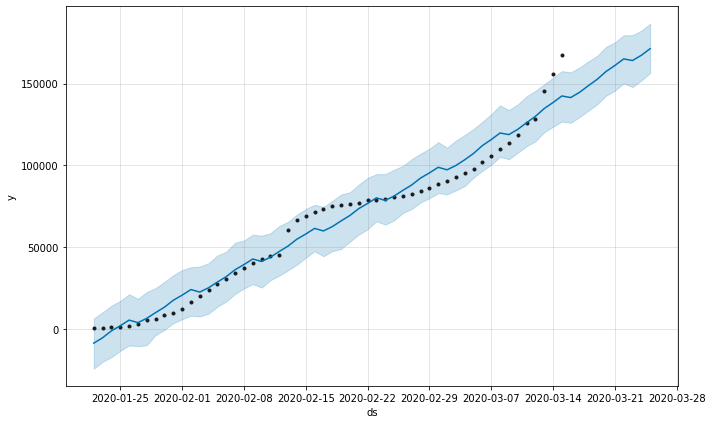

In [0]:
confirmed_forecast_plot = m.plot(forecast)

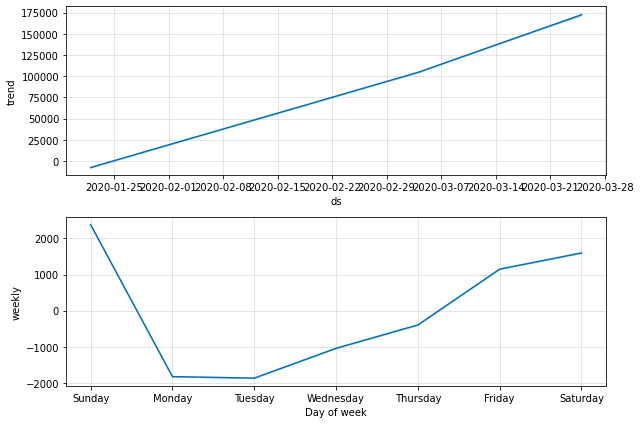

In [0]:
confirmed_forecast_plot =m.plot_components(forecast)

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
59,2020-03-21
60,2020-03-22
61,2020-03-23
62,2020-03-24
63,2020-03-25


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
59,2020-03-21,6770.709480,6363.062973,7203.429702
60,2020-03-22,7011.341739,6593.501694,7426.464537
61,2020-03-23,7094.159018,6692.543978,7498.252277
62,2020-03-24,7300.720352,6854.880897,7764.122223
63,2020-03-25,7539.129099,7088.597238,7991.465432


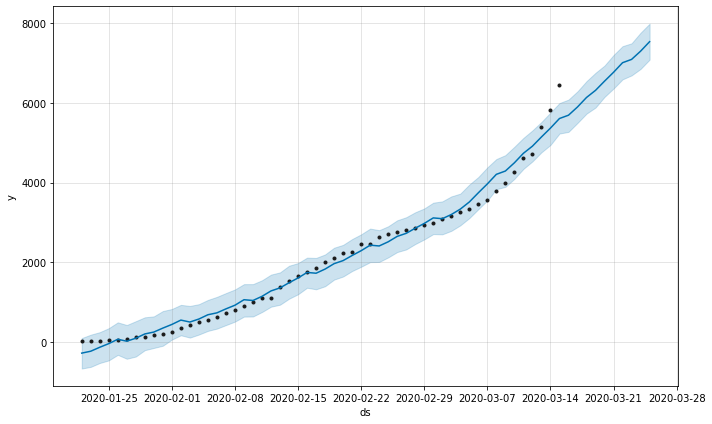

In [0]:
deaths_forecast_plot = m.plot(forecast)

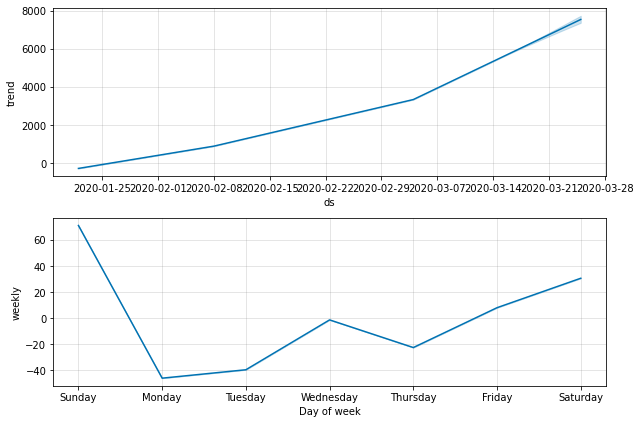

In [0]:
deaths_forecast_plot = m.plot_components(forecast)

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
56,2020-03-18
57,2020-03-19
58,2020-03-20
59,2020-03-21
60,2020-03-22


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-03-18,81659.035390,80608.100221,82707.158725
57,2020-03-19,83815.186422,82206.627659,85362.628146
58,2020-03-20,85921.056722,83769.009970,87907.735957
59,2020-03-21,88454.886537,85592.615131,91041.382802
60,2020-03-22,90626.029555,87029.820815,93893.622695


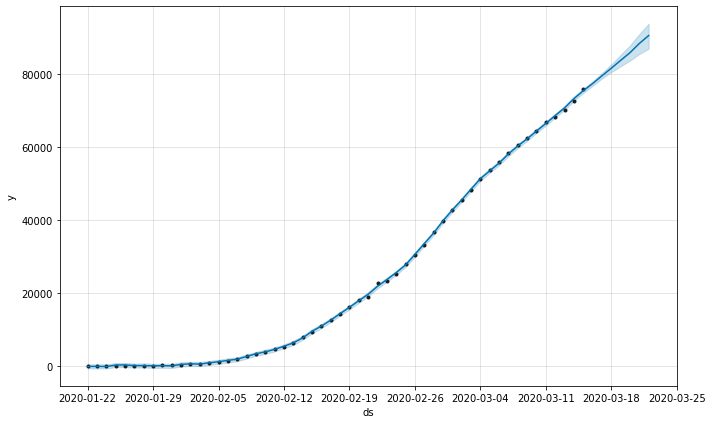

In [0]:
recovered_forecast_plot = m.plot(forecast)

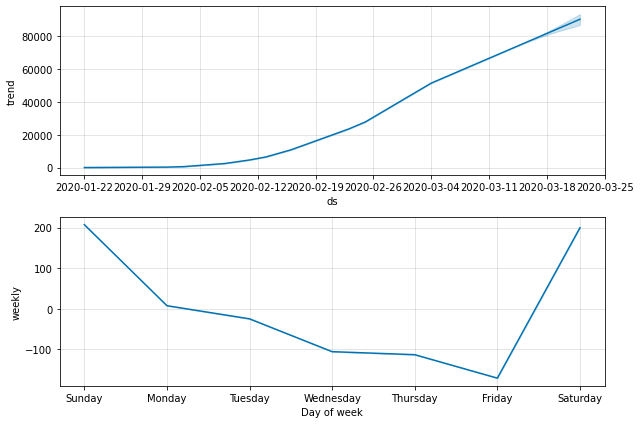

In [0]:
recovered_forecast_plot = m.plot_components(forecast)


In [0]:
conditions seems critical and not good.......if countries like korea,italy suffers like this so it wll be severe for india unless changes are taken 